Our **goal** is to predict **something** from **past data**. Here **something** is "Which class does a particular plant observation belong to?". We can predict **multiple observations** as well. We **train the model using past data** and **test the model on new data**. We can also split available data into train, validation and test data, and then perform training, validating and testing of the model.

What we are trying to figure out is "**formula for success**". for e.g. we know that a+b=c. Here we know the formula, we have past data and we can achieve 100% accurate result. So what we do is pass past data and algorithms to the process, and in return we get the prediction right. Sometimes we get **errors** in our predictions, so we *keep on correcting till we reach our potential in minimizing error*. Most likely, we will never be 100% correct, but we have to **increase our probability of success by reducing errors**. Each algorithm has its own assumptions, nuances and performance. This is something very complicated for layman or to be precise who doesnt have in depth maths and statistics background. So I will cover that later once you are more comfortable with the basics or fundamentals. We need to learn to crawl first before we can walk.

This is the first step. This is your **toolbox** for machine learning. Without it, you will be struggling. You don't want to reinvent the wheel. So you import all the packages, modules and classes needed to perform machine learning on your data.

In [1]:
import pandas as pd
import sklearn.datasets as skl_datasets
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection as sklms
import sklearn.linear_model as skllm
from sklearn.neighbors import KNeighborsClassifier

Now, you your process is ready to begin. You start with** bringing in your raw material**. Sometimes it will be very dirty and sometimes it will be as **tidy** as like Sklearn datasets. These are already cleaned up and ready to feed to your process. I will talk about how to make data from dirty to tidy in another article. Till then lets KISS (keep it simple)

In [2]:
ds_iris = skl_datasets.load_iris()

Once you have imported all the raw material i.e. your raw data to the procss, you would like to understand the background of it. It will tell you which **features or columns or attributes or independent variables** are present to predict the **target or outcome or dependent variable**. It will also tell you how many **observations or rows or instances** are present in the dataset. Sometimes you will get data that doesnt have a header or top row and sometimes it may have summary columns or rows. You need to ensure that your final output is that is like a table where all columns except last one are features and last column represents target variable, and all rows are observations. *From now onwards, I will only say features and target.*

In [3]:
print(ds_iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

Now you can look at your data at a high level. Feature names, Target Name, Features data, Target data

In [4]:
X = ds_iris.data
features = ds_iris.feature_names
y = ds_iris.target
target = ds_iris.target_names

We start with looking at feature data. What is the matrix or table size?  and few initial rows. It is stored in form of Numpy array where 150 rows and 4 columns are present. So it is a 150x4 matrix.

In [5]:
print(X.shape)
X[:5,:]

(150, 4)


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

Next we look at is feature names. As these names have text that is little complicated we can simplify them by converting them to simple names. Lets keep them simple. Naming convention we could follow is all lowercase and hyphen between each word

In [6]:
features

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
features = ['sepal-length','sepal-width','petal-length','petal-width']

In [8]:
features

['sepal-length', 'sepal-width', 'petal-length', 'petal-width']

Finally we look at target variable. Its size and top 5 values.

In [9]:
print(y.shape)
y[:5]

(150,)


array([0, 0, 0, 0, 0])

Now we look at target data. It clearly tells you that you have 3 classes. Each observation belongs to one of three classes available in past target data. All new data will be classified belonging to one of 3 classes. It also tells you about the data type of the target variable.

In [10]:
target

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

So what we are trying to work out is that we look at past data (features and target), train the model, and then use this model to predict on new available data in future

So we have X, y and features, target name. We will leverage this available to data to build our model and carry out rest of machine learning process to reach our end goal i.e. prediction on new data

From here on, we explore our data both in numbers and graphs. Both are important to get a feel of your data

But before we explore, we need to collect all different pieces of information and bundle them up in a dataframe, more so from a convenience perspective. Pandas DataFrame is like your table in a database or a spreadsheet tab or table.

In [11]:
# we convert numpy array to pandas dataframe
df_X = pd.DataFrame(X)
# we reshape the target variable to make it same number of rows as in X and 
# 1 column
y = y.reshape(-1,1)
# we convert y also to a dataframe
df_y = pd.DataFrame(y)
# finally we merge X and y together. axis=1 means concatenate column wise
df = pd.concat([df_X,df_y], axis=1)

In [12]:
# now we update feature and target names to the merged dataframe
features.append("class")
df.columns = features

In [13]:
# Finally, we look at the head of our monster :-)
df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
# Looks complete
# Did you notice first column contains integers. This is index of your table
# or dataframe
df.index

RangeIndex(start=0, stop=150, step=1)

Here we begin exploring our data, both numerically and graphically

In [15]:
df.describe()
# Looking at data, 
# I remember the song from Michael Jackson "The way you make me feel"
# You get a feeler for your data
# Each plant has a sepal and a petal
# Both have length and width
# We use these characteristics to classify each plant
# count - tells me that there no missing values or null observations in
# each column
# Looking at mean of Sepal length tells you that 
# it is the longest among all features
# You look at spread now and find petal length to have maximum variance
# you also get to know max and min of each feature
# also percentiles for each column

,sepal-length,sepal-width,petal-length,petal-width,class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


It is important to classify your data and divide them into multiple target classes

In [16]:
pd.pivot_table(data=df,index='class', aggfunc=[np.mean, np.median])

mean                                            median  \
      petal-length petal-width sepal-length sepal-width petal-length   
class                                                                  
0            1.464       0.244        5.006       3.418         1.50   
1            4.260       1.326        5.936       2.770         4.35   
2            5.552       2.026        6.588       2.974         5.55   

                                            
      petal-width sepal-length sepal-width  
class                                       
0             0.2          5.0         3.4  
1             1.3          5.9         2.8  
2             2.0          6.5         3.0

In [17]:
pd.pivot_table(data=df,index='class', aggfunc=[len, np.std])

len                                               std  \
      petal-length petal-width sepal-length sepal-width petal-length   
class                                                                  
0             50.0        50.0         50.0        50.0     0.173511   
1             50.0        50.0         50.0        50.0     0.469911   
2             50.0        50.0         50.0        50.0     0.551895   

                                            
      petal-width sepal-length sepal-width  
class                                       
0        0.107210     0.352490    0.381024  
1        0.197753     0.516171    0.313798  
2        0.274650     0.635880    0.322497

In [18]:
# Min, Max, Mean and Standard Deviation gives you a good feel about your data
# This is where ART comes into the picture. You can make your machine learning
# model more beautiful by look at all features and imagining what other
# features can be derived from available ones
df.groupby('class').agg([min, max, np.mean, np.std]).round(2)

sepal-length                  sepal-width                  petal-length  \
               min  max  mean   std         min  max  mean   std          min   
class                                                                           
0              4.3  5.8  5.01  0.35         2.3  4.4  3.42  0.38          1.0   
1              4.9  7.0  5.94  0.52         2.0  3.4  2.77  0.31          3.0   
2              4.9  7.9  6.59  0.64         2.2  3.8  2.97  0.32          4.5   

                       petal-width                   
       max  mean   std         min  max  mean   std  
class                                                
0      1.9  1.46  0.17         0.1  0.6  0.24  0.11  
1      5.1  4.26  0.47         1.0  1.8  1.33  0.20  
2      6.9  5.55  0.55         1.4  2.5  2.03  0.27

In [19]:
# we also look at data types of all features and target
df.info()
# data types looks ok. in case you dont feel ok, you need to convert them to 
# appropriate types like int, float, String, date time, etc.
# this will be covered in later articles

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal-length    150 non-null float64
sepal-width     150 non-null float64
petal-length    150 non-null float64
petal-width     150 non-null float64
class           150 non-null int32
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


Pictures are easy to grasp than just plain numbers. Lets explore plots or graphs now

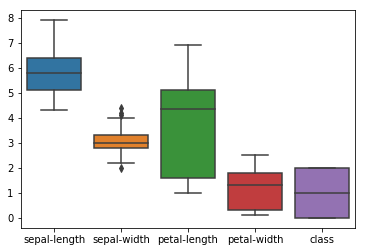

In [26]:
# first plot we look at is box plot for all the numerical features
sns.boxplot(data=df)
plt.show()

Looks much better, right? Plots are always better than just plain numbers

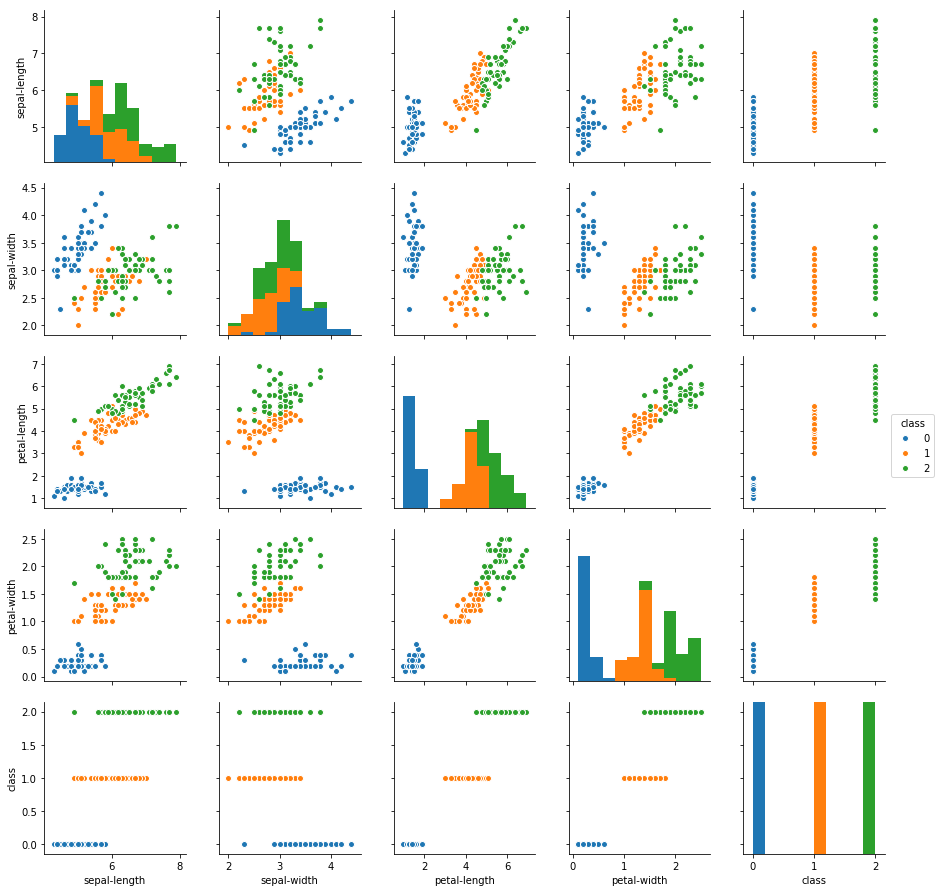

In [21]:
# time of finding correlation between features and target, also within features
# why within features is a topic for later articles
sns.pairplot(df, hue='class')
plt.show()

Just pair plot can help you classify observations into multiple classes. But what you are looking forward to do is to teach computer and not yourself. So back to numbers :-)

There are many more distribution plot classes available, but for later articles.

Time for teaching. Lets train our model.

In [22]:
# Prepare X and y
array = df.values
X = array[:,0:4]
y = array[:,4]
# Split into training and test dataset. 0.3 means 70% is training observations
validation_size = 0.30
# This is the random seed. So that when you run this code, we are on same 
# wavelength to discuss the model and results
seed = 7
# We are using Kfold cross validation to split the dataset and perform training
# and testing of the model. I will cover this later.
no_of_splits = 10
# This is your algorithm and you instantiate and pass it along with data
model = skllm.LogisticRegression()

# Used for splitting the dataset. Will be expanded in later article
kfold = sklms.KFold(n_splits=no_of_splits, random_state=seed)

# Here goes everything into the frying pan
X_train, X_test, Y_train, Y_test = sklms.train_test_split(
    X, y, test_size=validation_size, random_state=seed)

# and here comes the output or prediction. in this case we measure accuracy
cv_results = sklms.cross_val_score(model, X_train, Y_train, \
                             cv=kfold, scoring='accuracy')

In [23]:
msg = "%s: %f (%f)" % ("Logistic regression:", cv_results.mean(), cv_results.std())
print(msg)

Logistic regression:: 0.970909 (0.044499)


Are we done? Not yet. We want to look at our predictions also.

In [24]:
# Here we use another algorithm to predict
knn = KNeighborsClassifier()
# we train our model
knn.fit(X_train, Y_train)
# predict on our test observations
predictions = knn.predict(X_test)
# and here are our predictions
print(predictions)

[2. 1. 0. 1. 1. 0. 1. 1. 0. 1. 2. 1. 0. 2. 0. 1. 2. 2. 0. 0. 1. 2. 1. 1.
 2. 1. 1. 1. 2. 2. 2. 1. 0. 2. 1. 0. 0. 0. 0. 2. 2. 1. 2. 2. 1.]


So next time we can use this model to predict on new data. We just need input features to predict. This is our magic formula for success.